### Importando as tabelas de dados para dataframe

In [85]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_names = ['df_categoria', 'df_item','df_pais','df_regiao','df_perda','df_producao','df_item_pais']

In [198]:
df_filenames = ['df_categoria.pkl', 'df_item.pkl','df_pais.pkl','df_regiao.pkl',
                'df_perda.pkl','df_producao.pkl','df_item_pais.pkl']

In [238]:
id = 0
for df in df_filenames:
   vars()[df_names[id]] = pd.read_pickle(df)
   id += 1

In [241]:
df_perda.head(5)

,id_,peso,item_id1,pais_id_pais,ano
0,1,561,Trigo e produtos,Argentina,1998
1,2,538,Trigo e produtos,Argentina,1999
2,3,537,Trigo e produtos,Argentina,2000
3,4,521,Trigo e produtos,Argentina,2001
4,5,482,Trigo e produtos,Argentina,2002


### Selecionando uma amostra do total de dados

Aqui estamos limitando os dados que serão utilizados na criação do grafo, uma vez que no total o dataframe de produção por examplo possui mais de 20 mil linhas. Um número muito grande de elementos num mesmo grafo dificulta a visualização das informações que queremos mostrar. Assim, optou-se pela construção do grafo com dados limitados a um mesmo ano e a uma categoria de itens dentre as quatro existentes. Podemos repetir os códigos de criação de um grafo para formar cada um dedicado exclusivamente à um ano específico. Assim, o objetivo se foca em comparar os números de perda entre os países e não em relação aos dados temporais.

In [240]:
#Adicionando os nomes ao invés dos ids para facilitar a criação das arestas
for idx in df_perda.index:
    df_perda.loc[idx, 'item_id1'] =  df_item.loc[df_perda.loc[idx, 'item_id1'] - 1, 'nome']
    df_perda.loc[idx, 'pais_id_pais'] =  df_pais.loc[df_perda.loc[idx, 'pais_id_pais'] - 1, 'nome']

### Criando os grafos


In [226]:
G = nx.Graph()
for idx in df_pais.index:
    G.add_node(df_pais.loc[idx, 'nome'], 
               nodetype='pais', 
               color='#00CED1')

In [227]:
for idx in df_item.index:
    G.add_node(df_item.loc[idx, 'nome'], 
               nodetype='item', 
               color='#F08080')

In [229]:
G.add_edge('Peru', 'Aveia',
           frequency = 1,
          color = 'blue')

In [231]:
for idx in df_perda.index:
    G.add_edge(df_perda.loc[idx, 'item_id1'],
               df_perda.loc[idx, 'pais_id_pais'], 
               color='pink',
               frequency = 1)

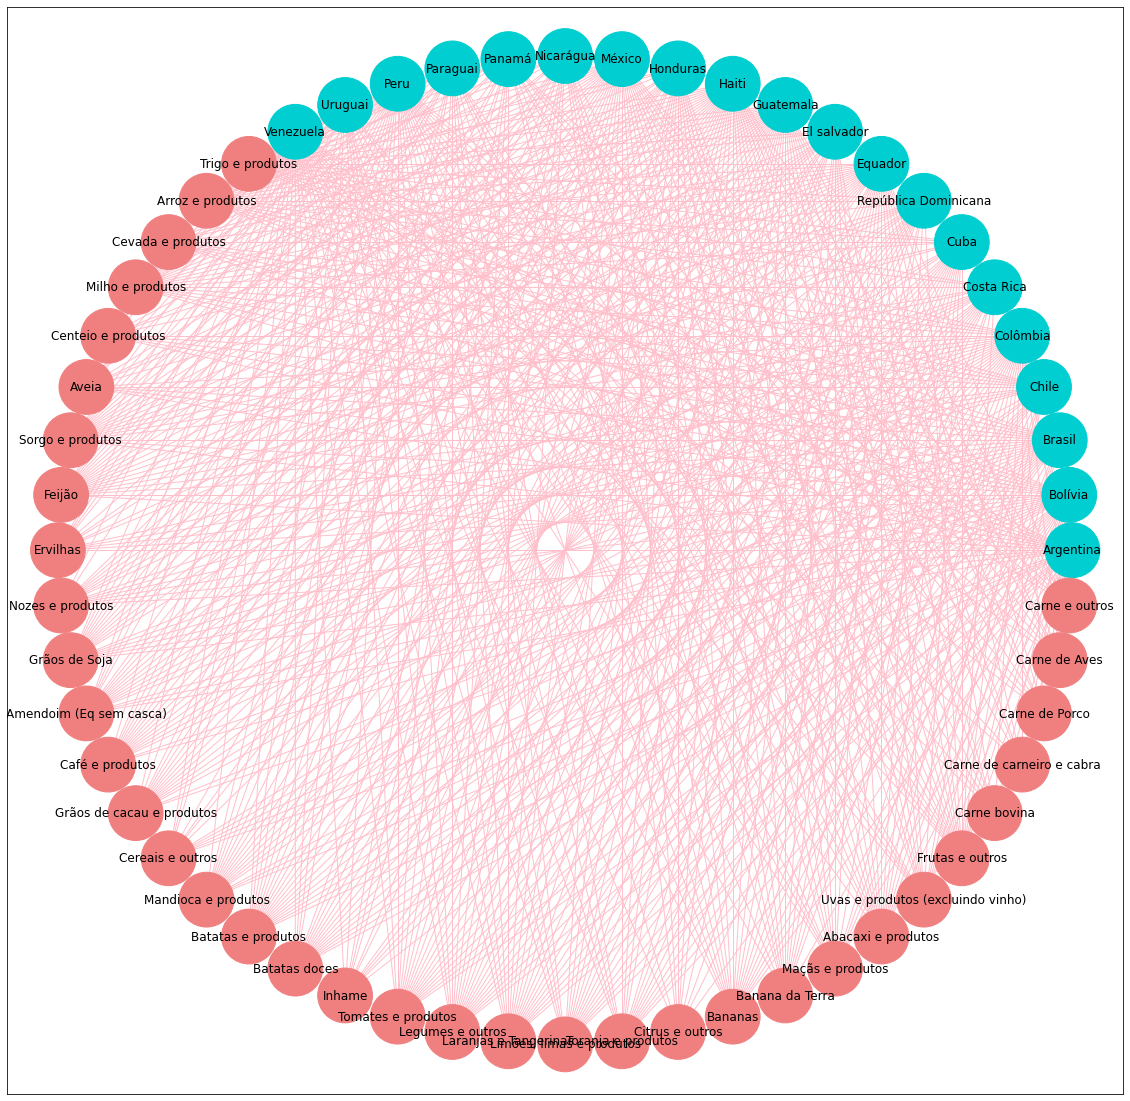

In [237]:
pos = nx.drawing.layout.circular_layout(G)
fig, ax = plt.subplots(figsize=(20,20))
nx.draw_networkx(G,
                pos = pos,
                node_color = [nx.get_node_attributes(G,'color')[g] for g in G.nodes()],
                node_size = 3000,
                edge_color=[nx.get_edge_attributes(G,'color')[g] for g in G.edges()])

Podemos notar que a visualização acima, apesar de ser uma figura interessante não nos diz quase nada sobre 
perguntas que queremos responder considerando o banco de dados que temos. G aqui tem todos os países, todos
os itens e as arestas não possuem a informação do ano.

### Criando consultas com o python

### Aplicação interativa para consulta e visualização dos grafos